# XGBoost

`pip install xgboost`


In [61]:
import os, sys, pathlib

UTILS_FOLDER = 'S00 - Utils'
curPath = os.getcwd()
parPath = pathlib.Path(curPath).parent
utilPath = os.path.join(parPath, UTILS_FOLDER)
for p in [curPath, str(parPath), utilPath]:
    sys.path.append(p)

In [62]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from utils import plot_ds
from xgboost import XGBClassifier

In [63]:
# Read data
iris = datasets.load_iris()

# Extract the last 2 columns
X = iris.data[:, 2:4]
y = iris.target

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [64]:
# Model
xgb = XGBClassifier(n_estimators=500, eta=0.1, max_depth=10, gamma=0, min_child_weight=0)

Misclassified examples: 2
Accuracy score: 0.9555555555555556


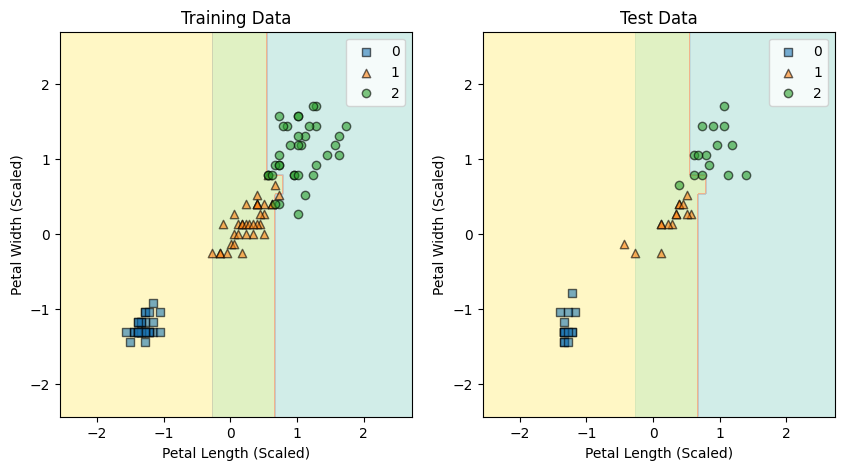

In [65]:
# Training
xgb.fit(X_train_std, y_train)

# Prediction
y_pred = xgb.predict(X_test_std)

# Misclassification from the test samples
sumMiss = (y_test != y_pred).sum()

# Accuracy score from the test samples
accuracyScore = accuracy_score(y_test, y_pred)

print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

# Plot decision regions
plot_ds(X_train_std, X_test_std, y_train, y_test, xgb)